# Diplomski rad 03
26\. ožujka 2017.



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import graphviz as gv
import networkx as nx
import pydot
import os
from aux import log_progress
from importlib import reload
import funkcije
reload(funkcije)
from funkcije import *
from collections import Counter

matplotlib.rcParams['figure.figsize'] = (12, 5)


## Statistička arbitraža (staro)

In [2]:
# učitavanje podataka
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
days, N = sp500.shape
P = N * (N - 1) // 2

# log-cijene
sp500_log = np.log(sp500)

# razlike log cijena po parovima
sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

In [47]:
T = 500
p = 0.008
d = 3.75

method = 'thresh-devs'

sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)
ts, profits, pairs, weights = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars, p=p, d=d,
                                                        method=method, return_pairs=True, return_weights=True)

In [53]:
ppairs = partition_as(ts, pairs)
profit = []
shares = []
ts_plot = []
e = 0
for t, ppair in log_progress(list(ppairs)):
    preferences = calculate_preference_flow(ppair, scale=True)
    m = max(np.abs(list(preferences.values())))
    tops = np.array([k for k, v in preferences.items() if v >= m - e])
    bottoms = np.array([k for k, v in preferences.items() if -m + e>= v])
    p = []
    if len(tops) != 0:
        ttops = np.array([t] * len(tops))
        p.extend(trade_singles(sp500_log, ttops, tops, inv=False))
        shares.extend(tops)
        ts_plot.extend(ttops)
    if len(bottoms) != 0:
        tbottoms = np.array([t] * len(bottoms))
        p.extend(trade_singles(sp500_log, tbottoms, bottoms, inv=True))
        shares.extend(bottoms)
        ts_plot.extend(tbottoms)
    profit.extend([p_ / len(p) for p_ in p])

shares = np.array(shares)
ts_plot = np.array(ts_plot)
profit = np.array(profit)

Na godišnjoj razini:
Avg: 0.43119
Stddev: 0.39742
Sharpe ratio: 1.08495


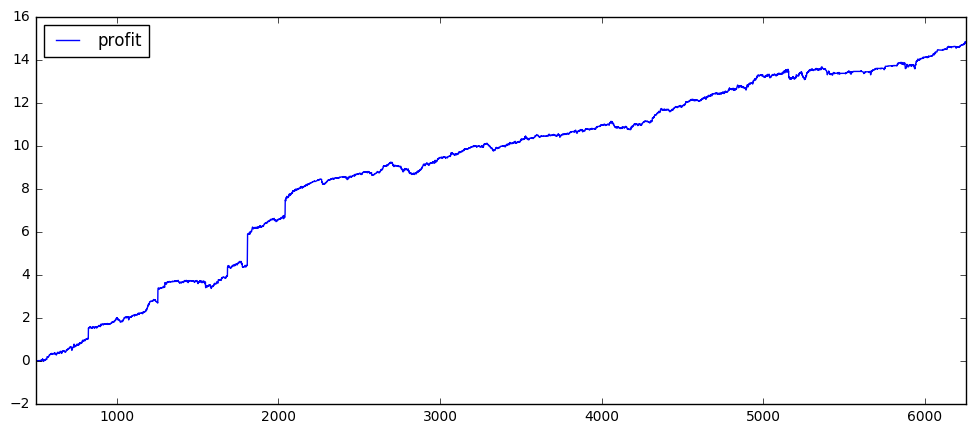

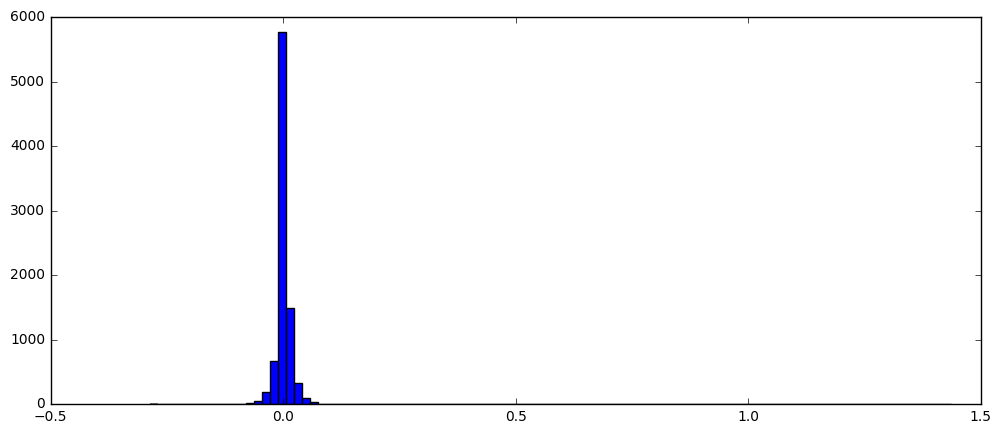

In [54]:
plt.figure()
plt.plot(ts_plot, np.cumsum(profit))
plt.legend(['profit'], loc='best')
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure()
plt.hist(profit, bins=100)

avg = np.mean(profit) * 252
std = np.std(profit) * np.sqrt(252)
sharpe = avg / std
print('Na godišnjoj razini:')
print('Avg: {:.5f}'.format(avg))
print('Stddev: {:.5f}'.format(std))
print('Sharpe ratio: {:.5f}'.format(sharpe))


## Statističke značajke #1

In [2]:
# učitavanje podataka
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
days, N = sp500.shape
P = N * (N - 1) // 2

# log-cijene
sp500_log = np.log(sp500)

# razlike log cijena po parovima
sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

In [3]:
T = 500
p = 0.008
d = 3.75

method = 'thresh-devs'

sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)
ts, profits, pairs = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars, p=p, d=d,
                                           method=method, return_pairs=True)

ts_all, _, pairs_all = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars, p=p, d=0.0,
                                             method=method, return_pairs=True)

In [16]:
ppairs_all = partition_as(ts_all, pairs_all)
ppairs = partition_as(ts, pairs)
profit = []
shares = []
ts_plot = []
e = 0
t_all = None
for t, ppair in log_progress(list(ppairs)):
    while t_all != t:
        t_all, ppair_all = next(ppairs_all)

    preferences = calculate_preference_flow(ppair_all, scale=True)
    m = max(np.abs(list(preferences.values())))
    tops = np.array([k for k, v in preferences.items() if v >= m - e])
    bottoms = np.array([k for k, v in preferences.items() if -m + e>= v])
    p = []
    if len(tops) != 0:
        ttops = np.array([t] * len(tops))
        p.extend(trade_singles(sp500_log, ttops, tops, inv=False))
        shares.extend(tops)
        ts_plot.extend(ttops)
    if len(bottoms) != 0:
        tbottoms = np.array([t] * len(bottoms))
        p.extend(trade_singles(sp500_log, tbottoms, bottoms, inv=True))
        shares.extend(bottoms)
        ts_plot.extend(tbottoms)
    profit.extend([p_ / len(p) for p_ in p])

shares = np.array(shares)
ts_plot = np.array(ts_plot)
profit = np.array(profit)

Na godišnjoj razini:
Avg: 0.38385
Stddev: 0.25615
Sharpe ratio: 1.49857


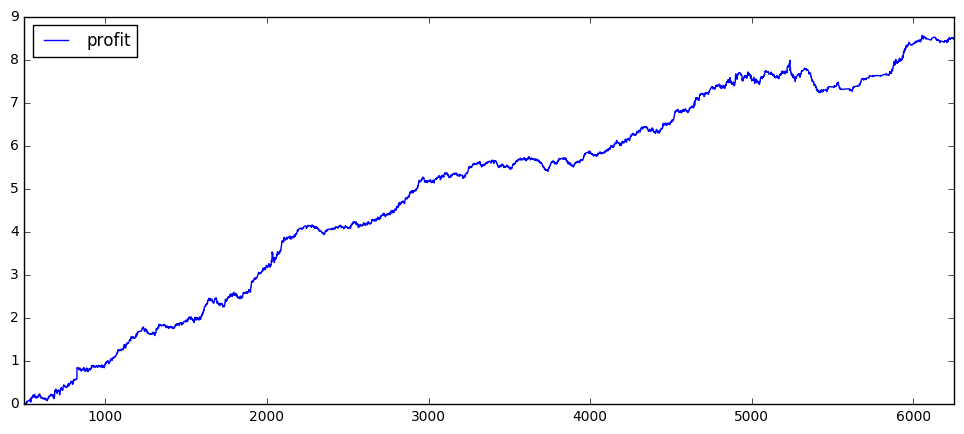

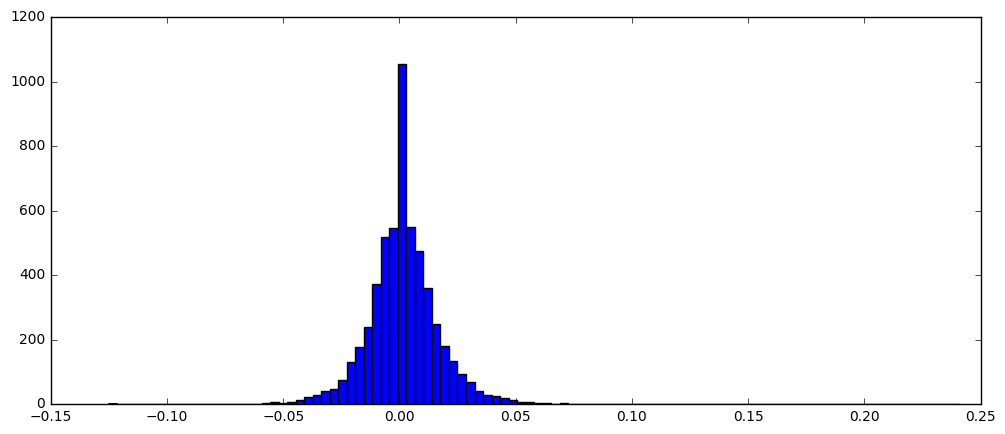

In [17]:
plt.figure()
plt.plot(ts_plot, np.cumsum(profit))
plt.legend(['profit'], loc='best')
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure()
plt.hist(profit, bins=100)

avg = np.mean(profit) * 252
std = np.std(profit) * np.sqrt(252)
sharpe = avg / std
print('Na godišnjoj razini:')
print('Avg: {:.5f}'.format(avg))
print('Stddev: {:.5f}'.format(std))
print('Sharpe ratio: {:.5f}'.format(sharpe))


## Statističke značajke #2

In [3]:
# učitavanje podataka
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
days, N = sp500.shape
P = N * (N - 1) // 2

# log-cijene
sp500_log = np.log(sp500)

# razlike log cijena po parovima
sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

In [6]:
T = 500
p = 0.008
d = 3.75

method = 'thresh-devs'

sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)
ts, profits, pairs = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars, p=p, d=d,
                                           method=method, return_pairs=True)

ts_all, _, pairs_all = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars, p=p, d=0.0,
                                             method=method, return_pairs=True)

In [7]:
ppairs_all = partition_as(ts_all, pairs_all)
ppairs = partition_as(ts, pairs)
profit = []
shares = []
ts_plot = []
e = 5
t_all = None
for t, ppair in log_progress(list(ppairs)):
    while t_all != t:
        t_all, ppair_all = next(ppairs_all)

    preferences = calculate_preference_flow(ppair_all, scale=True)
    m = max(np.abs(list(preferences.values())))
    tops = np.array([k for k, v in preferences.items() if v >= m - e])
    bottoms = np.array([k for k, v in preferences.items() if -m + e>= v])
    p = []
    if len(tops) != 0:
        ttops = np.array([t] * len(tops))
        p.extend(trade_singles(sp500_log, ttops, tops, inv=False))
        shares.extend(tops)
        ts_plot.extend(ttops)
    if len(bottoms) != 0:
        tbottoms = np.array([t] * len(bottoms))
        p.extend(trade_singles(sp500_log, tbottoms, bottoms, inv=True))
        shares.extend(bottoms)
        ts_plot.extend(tbottoms)
    profit.extend([p_ / len(p) for p_ in p])

shares = np.array(shares)
ts_plot = np.array(ts_plot)
profit = np.array(profit)

Na godišnjoj razini:
Avg: 0.13793
Stddev: 0.11535
Sharpe ratio: 1.19576


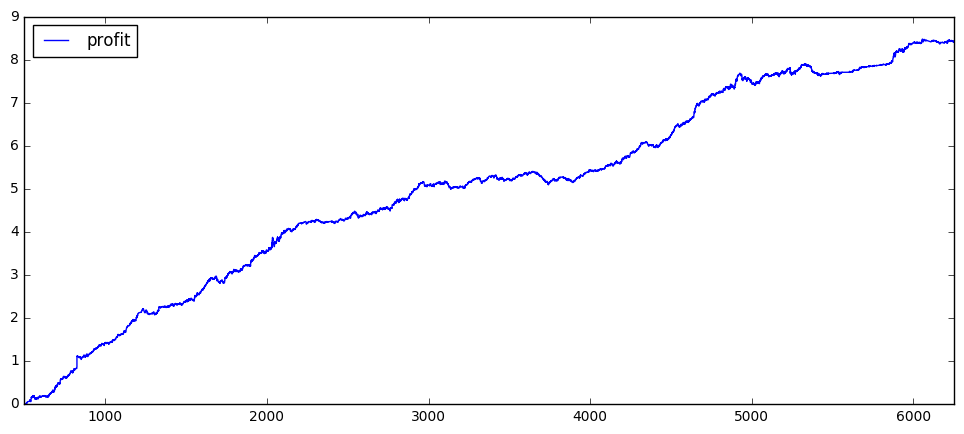

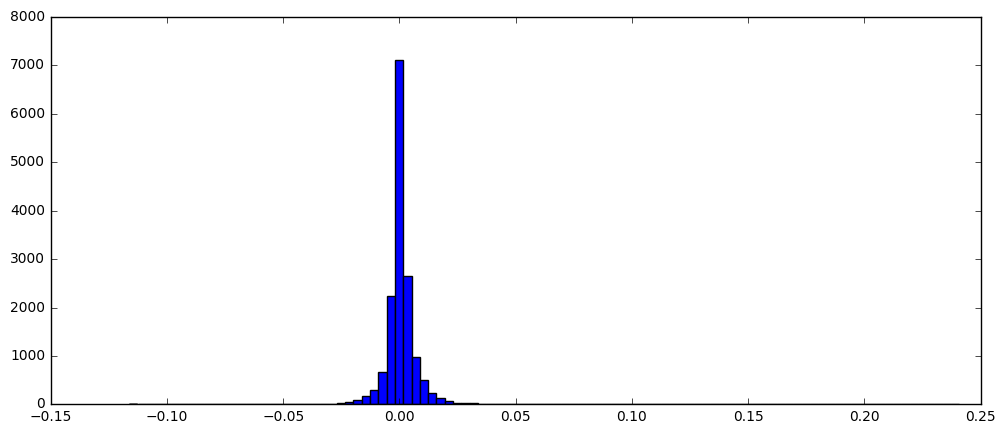

In [8]:
plt.figure()
plt.plot(ts_plot, np.cumsum(profit))
plt.legend(['profit'], loc='best')
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure()
plt.hist(profit, bins=100)

avg = np.mean(profit) * 252
std = np.std(profit) * np.sqrt(252)
sharpe = avg / std
print('Na godišnjoj razini:')
print('Avg: {:.5f}'.format(avg))
print('Stddev: {:.5f}'.format(std))
print('Sharpe ratio: {:.5f}'.format(sharpe))


## Statističke značajke #3

In [2]:
# učitavanje podataka
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
days, N = sp500.shape
P = N * (N - 1) // 2

# log-cijene
sp500_log = np.log(sp500)

# razlike log cijena po parovima
sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

In [3]:
T = 500
p = 0.008
d = 3.75

method = 'thresh-devs'

sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)
ts, profits, pairs = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars, p=p, d=d,
                                           method=method, return_pairs=True)

ts_all, _, pairs_all = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars, p=p, d=0.0,
                                             method=method, return_pairs=True)

In [5]:
prefs = []
for _, ppair in partition_as(ts_all, pairs_all):
    prefs.extend(calculate_preference_flow(ppair).values())


Abs. avg: 0.07116
Abs. median: 0.04678


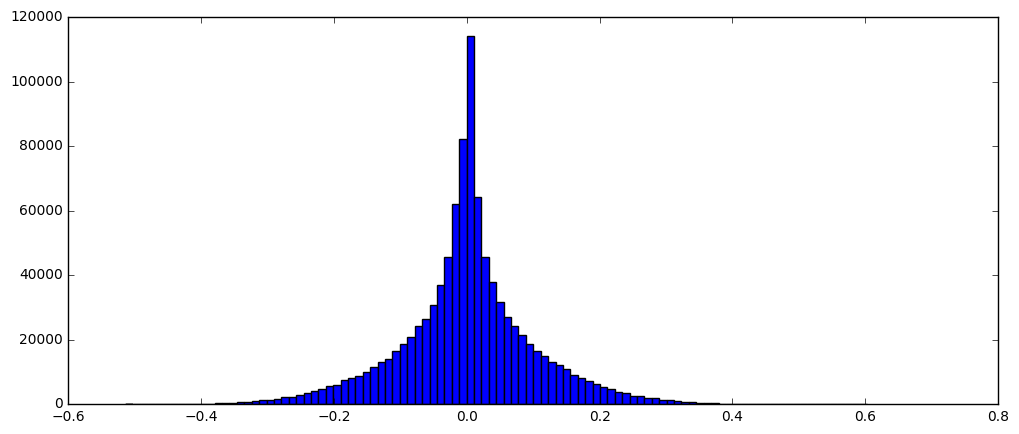

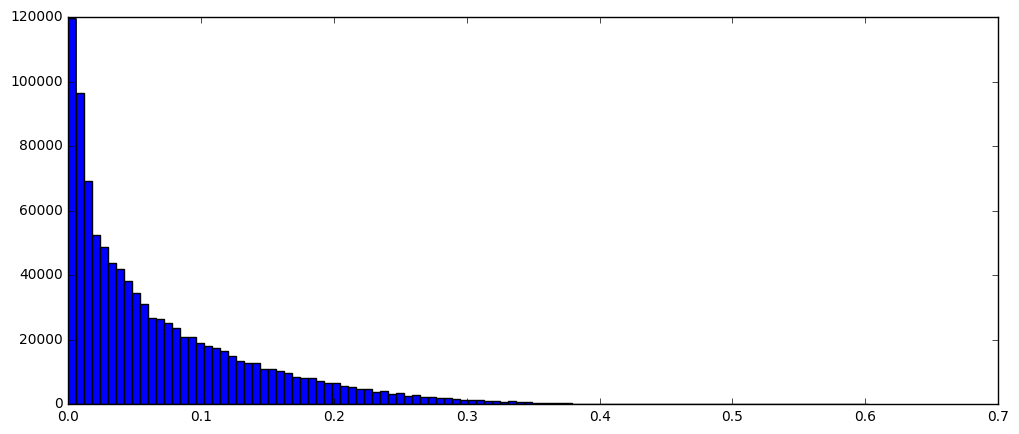

In [10]:
plt.figure()
plt.hist(prefs, bins=100)
plt.figure()
plt.hist(np.abs(prefs), bins=100)
print('Abs. avg: {:.5f}'.format(np.mean(np.abs(prefs))))
print('Abs. median: {:.5f}'.format(np.median(np.abs(prefs))))

In [4]:
ppairs_all = partition_as(ts_all, pairs_all)
ppairs = partition_as(ts, pairs)
profit = []
shares = []
ts_plot = []
e = 0.3
t_all = None
for t, ppair in log_progress(list(ppairs)):
    while t_all != t:
        t_all, ppair_all = next(ppairs_all)

    preferences = calculate_preference_flow(ppair_all)
    # m = max(np.abs(list(preferences.values())))
    tops = np.array([k for k, v in preferences.items() if v >= e])
    bottoms = np.array([k for k, v in preferences.items() if -e>= v])
    p = []
    if len(tops) != 0:
        ttops = np.array([t] * len(tops))
        p.extend(trade_singles(sp500_log, ttops, tops, inv=False))
        shares.extend(tops)
        ts_plot.extend(ttops)
    if len(bottoms) != 0:
        tbottoms = np.array([t] * len(bottoms))
        p.extend(trade_singles(sp500_log, tbottoms, bottoms, inv=True))
        shares.extend(bottoms)
        ts_plot.extend(tbottoms)
    profit.extend([p_ / len(p) for p_ in p])

shares = np.array(shares)
ts_plot = np.array(ts_plot)
profit = np.array(profit)

Na godišnjoj razini:
Avg: 0.04607
Stddev: 0.06919
Sharpe ratio: 0.66574


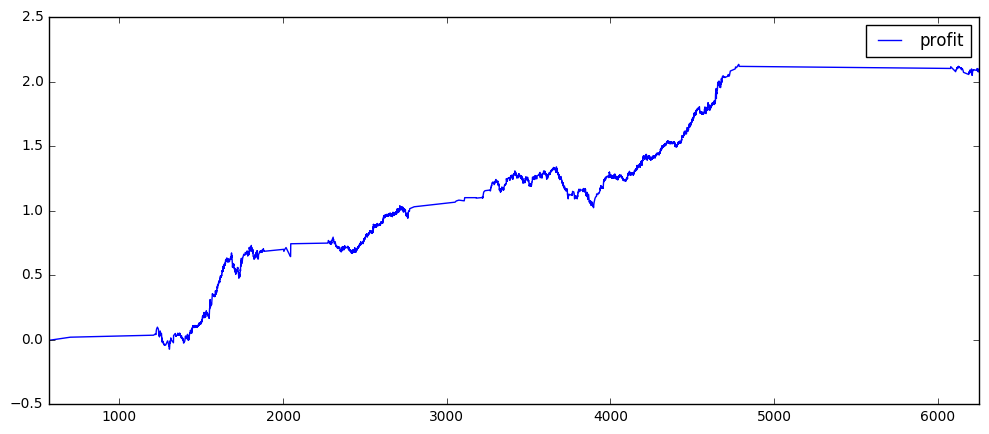

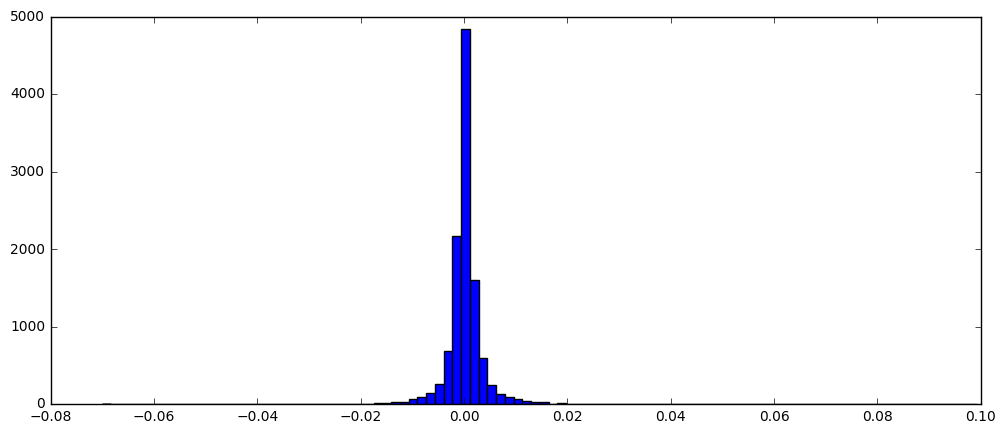

In [5]:
plt.figure()
plt.plot(ts_plot, np.cumsum(profit))
plt.legend(['profit'], loc='best')
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure()
plt.hist(profit, bins=100)

avg = np.mean(profit) * 252
std = np.std(profit) * np.sqrt(252)
sharpe = avg / std
print('Na godišnjoj razini:')
print('Avg: {:.5f}'.format(avg))
print('Stddev: {:.5f}'.format(std))
print('Sharpe ratio: {:.5f}'.format(sharpe))


In [24]:
ppairs_all = partition_as(ts_all, pairs_all)
ppairs = partition_as(ts, pairs)
profit = []
shares = []
ts_plot = []
e = 0
negatives = []
positives = []
tnegatives = []
tpositives = []
t_all = None
for t, ppair in log_progress(list(ppairs)):
    while t_all != t:
        t_all, ppair_all = next(ppairs_all)

    preferences = calculate_preference_flow(ppair, scale=True)
    m = max(np.abs(list(preferences.values())))
    tops = np.array([k for k, v in preferences.items() if v >= m - e])
    bottoms = np.array([k for k, v in preferences.items() if -m + e>= v])
    p = []
    if len(tops) != 0:
        ttops = np.array([t] * len(tops))
        trades = trade_singles(sp500_log, ttops, tops, inv=False)
        p.extend(trades)
        a = tops[trades < 0]
        negatives.extend(a)
        tnegatives.extend([t] * len(a))
        a = tops[trades >= 0]
        positives.extend(a)
        tpositives.extend([t] * len(a))
#         shares.extend(tops)
#         ts_plot.extend(ttops)
    if len(bottoms) != 0:
        tbottoms = np.array([t] * len(bottoms))
        trades = trade_singles(sp500_log, tbottoms, bottoms, inv=True)
        p.extend(trades)
        a = bottoms[trades < 0]
        negatives.extend(a)
        tnegatives.extend([t] * len(a))
        a = bottoms[trades >= 0]
        positives.extend(a)
        tpositives.extend([t] * len(a))
#         shares.extend(bottoms)
#         ts_plot.extend(tbottoms)
    profit.extend([p_ / len(p) for p_ in p])

shares = np.array(shares)
ts_plot = np.array(ts_plot)
profit = np.array(profit)

In [25]:
ppairs_dict = {k: calculate_preference_flow(v, scale=True) for k, v in log_progress(list(partition_as(ts_all, pairs_all)))}
ppairs = partition_as(ts, pairs)
    

In [26]:
negative_links = [ppairs_dict[t][n] for t, n in zip(tnegatives, negatives)]
positive_links = [ppairs_dict[t][n] for t, n in zip(tpositives, positives)]

accuracy: 0.60883


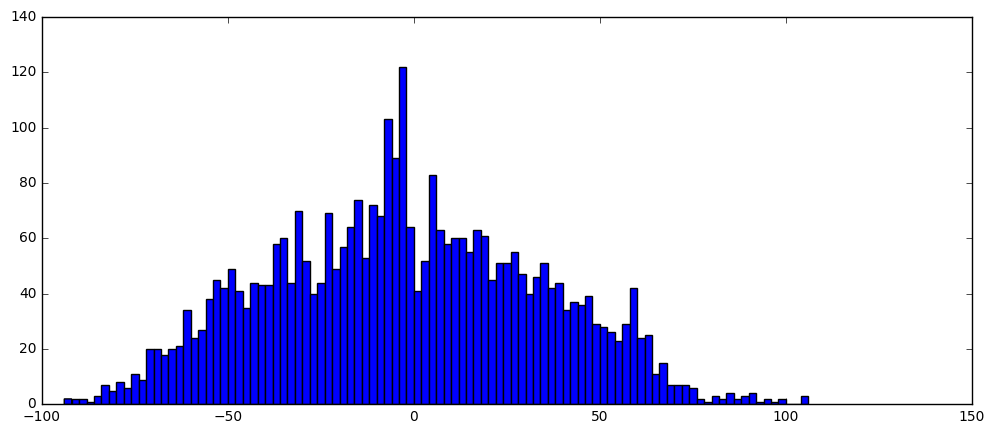

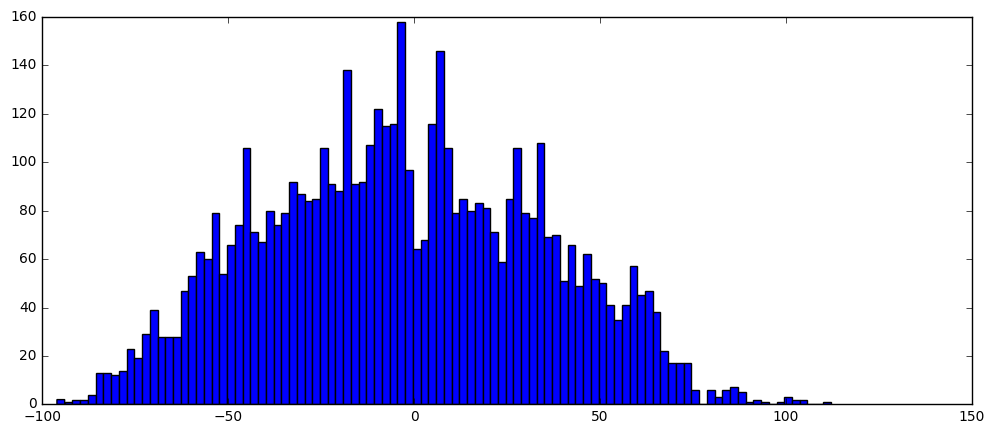

In [28]:
plt.figure()
plt.hist(negative_links, bins=100)
plt.figure()
plt.hist(positive_links, bins=100);
print('accuracy: {:.5f}'.format(len(positive_links) / (len(negative_links) + len(positive_links))))